memory capacity: 3.9232105310415464


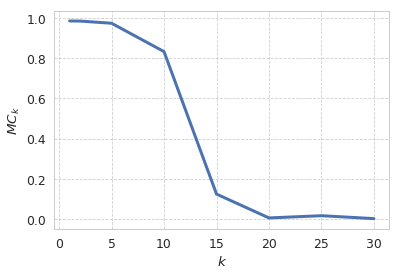

In [4]:
"""
Example: 
reproduce results with parameters used by H. Jaeger in
"Short Term Memory in Echo State Networks", 2001.
"""
import numpy as np

from echoes.tasks import MemoryCapacity
from echoes.plotting import plot_forgetting_curve, set_mystyle

set_mystyle() # make nicer plots, can be removed

# Echo state network parameters (after Jaeger)
n_reservoir = 20
W = np.random.choice([0, .47, -.47], p=[.8, .1, .1], size=(n_reservoir, n_reservoir))
W_in = np.random.choice([.1, -.1], p=[.5, .5], size=(n_reservoir, 2))

# Task parameters (after Jaeger)
inputs_func=np.random.uniform   
inputs_params={"low":-.5, "high":.5, "size":200}
lags = [1, 2, 5, 10, 15, 20, 25, 30]

esn_params = dict(
    n_inputs=1,
    n_outputs=len(lags),  # automatically decided based on lags
    n_reservoir=20,
    W=W,
    W_in=W_in,
    spectral_radius=.9,       
    bias=0,
    n_transient=100,
    regression_params={
        "method": "pinv"  
    },
    random_seed=42,
    verbose=False
)    

# Initialize the task object
mc = MemoryCapacity(
    inputs_func=inputs_func,                     
    inputs_params=inputs_params,  
    esn_params=esn_params,
    lags=lags
).fit_predict()  # Run the task

plot_forgetting_curve(mc.lags, mc.forgetting_curve_, linewidth=3)                    
print("memory capacity:", mc.memory_capacity_)